<a href="https://colab.research.google.com/github/KIMDOKYOUNG/DeepLearning/blob/master/chapter3/chapter_3.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>


## 밑바닥부터 시작하는 딥러닝 1 뽀개기
#### CHAPTER 3 신경망 
#### 일자 : 2020-08-12

- 가중치를 직접주는 것이 아니라 데이터로부터 자동으로 학습하는 능력이 신경망의 중요한 성질이다.

- 신경망의 구조 
  - 입력층
  - 은닉층 
  - 출력층

- 신호를 전달하는 방법 
1. 가중치가 곱해진 입력신호와 편향(bias)의 총합 계산
2. 활성화 함수에 입력해 결과를 낸다.

### # 활성화 함수 종류 
- 시그모이드 함수 
- 계단 함수
- ReLU 함수


In [1]:
import numpy as np
import matplotlib.pyplot as plt


#### 계단 함수 구현 

0 보다 크면 1, 0보다 작으면 -1 반환하는 함수 

In [2]:
x = np.array([-1.0,1.0,2.0])
x

array([-1.,  1.,  2.])

In [3]:
y = x > 0
y 

array([False,  True,  True])

In [4]:
y = y.astype(np.int)
y

array([0, 1, 1])

In [5]:
def setp_function(x):
  return np.array(x > 0, dtype=np.int) # y.astype(np.int)와 같다

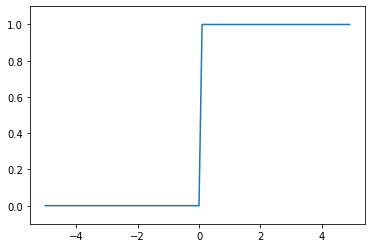

In [6]:
x = np.arange(-5.0,5.0,0.1)
y = setp_function(x)
plt.plot(x,y)
plt.ylim(-0.1,1.1)
plt.show()

#### 시그모이드 함수 구현 

In [7]:
def sigmoid(x):
  return 1 / (1 + np.exp(-x))

In [8]:
x = np.array([-1.0,1.0,2.0])
sigmoid(x)

array([0.26894142, 0.73105858, 0.88079708])

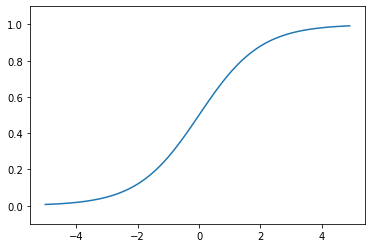

In [9]:
x = np.arange(-5.0,5.0,0.1)
y = sigmoid(x)
plt.plot(x,y)
plt.ylim(-0.1,1.1)
plt.show()

#### ReLU 함수 구현
x가 0 보다 크면 x를 유지하고, 0 보다 작으면 0을 반환하는 활성화 함수 

In [10]:
def relu(x):
  return np.maximum(0,x)

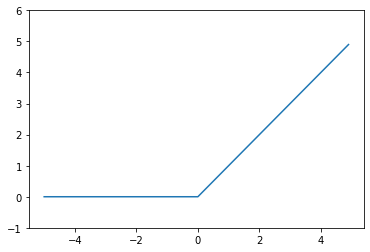

In [11]:
x = np.arange(-5.0,5.0,0.1)
y = relu(x)
plt.plot(x,y)
plt.ylim(-1,6)
plt.show()

### 다차원 배열의 계산


In [12]:
A = np.array([1,2,3,4])
print(A)

A.shape


[1 2 3 4]


(4,)

(1,4)의 shape을 가지고 있다. 1차원 배열이고 원소4개로 구성되어 있다는 뜻 


In [13]:
A.ndim

1

ndim을 통해서도 차원 수를 구할 수 있다.

#### 행렬의 내적(행렬 곱) 

In [14]:
A = np.array([[2,3],[4,5]])
print(A.shape)
B = np.array([[6,7],[8,9]])
print(B.shape)

(2, 2)
(2, 2)


In [15]:
np.dot(A,B)

array([[36, 41],
       [64, 73]])

In [16]:
np.dot(B,A)

array([[40, 53],
       [52, 69]])

- 내적은 원소별로 곱하고 그 값들을 더하는 것이다. 
- 원소합(matmul)이 아니므로 순서를 바꿔서 입력하면 당연히 값이 다르게 나온다. 
- 대응하는 차원의 원소 수를 일치 시켜야 된다.

### 3층 신경망 신호 전달
- 순방향 전달

In [21]:
def identity_funtion(x):
  return x

def init_network(): # 가중치와 편향 초기화 
  network = {}
  network['W1'] = np.array([[0.1,0.3,0.5],[0.2,0.4,0.6]])
  network['b1'] = np.array([0.1,0.2,0.3])
  network['W2'] = np.array([[0.1,0.4],[0.2,0.5],[0.3,0.6]])
  network['b2'] = np.array([0.1,0.2])
  network['W3'] = np.array([[0.1,0.3],[0.2,0.4]])
  network['b3'] = np.array([0.1,0.2])

  return network

def forward(network, x): # 입력 신호 출력 
  W1,W2,W3 = network['W1'],network['W2'],network['W3']
  b1,b2,b3 = network['b1'],network['b2'],network['b3']

  a1 = np.dot(x,W1) +b1
  z1 = sigmoid(a1)
  a2 = np.dot(z1,W2) + b2
  z2 = sigmoid(a2)
  a3 = np.dot(z2,W3) +b3
  y = identity_funtion(a3)

  return y

network = init_network()
x = np.array([1.0,0.5])
y = forward(network, x)

print(y)


[0.31682708 0.69627909]


### 출력층 설계
- 회귀 : 항등 함수 
- 분류 : 소프트맥스 함수 

### 소프트맥스 함수 구현 

In [22]:
def softmax(a):
  exp = np.exp(a)
  all_exp = np.sum(exp)
  return exp/all_exp


In [24]:
x = np.array([0.2,2.6,1.7])
softmax(x)

array([0.06058819, 0.66787436, 0.27153745])

그치만 위처럼 구현을 하면 큰값끼리 나눗셈을 하면 오버플로가 발생(너무 큰값을 표현 할 수 없다)

입력 신호 중 최댓 값을 사용해서 오버플로를 막을 수 있다. 

In [42]:
def softmax(a):
  max_num = np.max(a)
  exp = np.exp(a - max_num)
  all_exp = np.sum(exp)
  return  exp / all_exp

In [39]:
x = np.array([1000,1004,900])
softmax(x)

/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:2: RuntimeWarning: overflow encountered in exp
  
/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:5: RuntimeWarning: invalid value encountered in true_divide
  """


array([nan, nan, nan])

In [45]:
x = np.array([1000,1004,900])
y = softmax(x)
y

array([1.79862100e-02, 9.82013790e-01, 6.69100676e-46])

In [46]:
np.sum(y)

1.0

- 입력 신호 중 최댓값을 빼주고 계산을 했더니 오버플로가 발생하지 않아 값이 제대로 나오는 것을 볼 수 있다. 
- 출력층의 뉴런 수는 분류하고 싶은 클래스의 수로 한다. 